In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [48]:

img_bgr = cv2.imread('problemImages/lvl1.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

In [50]:



(thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
#img_bin = 255-img_bin 
#plt.imshow(img_bin, cmap="gray")


# Defining a kernel length
kernel_length = np.array(img).shape[1]//20
# A vertical kernel of (1 X kernel_length), which will detect all the v lines from the image.
v_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
h_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, v_kernel, iterations=3)
v_lines_img = cv2.dilate(img_temp1, v_kernel, iterations=3)
#plt.imshow(v_lines_img)
# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, h_kernel, iterations=3)
h_lines_img = cv2.dilate(img_temp2, h_kernel, iterations=3)
#plt.imshow(h_lines_img)

# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(v_lines_img, alpha, h_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

        

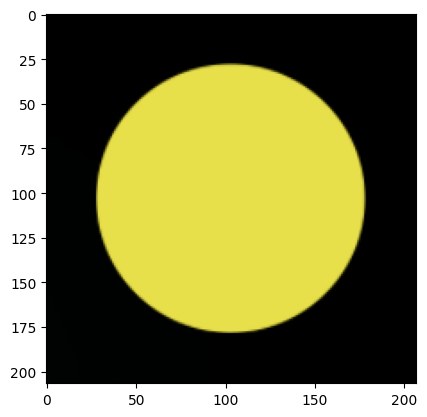

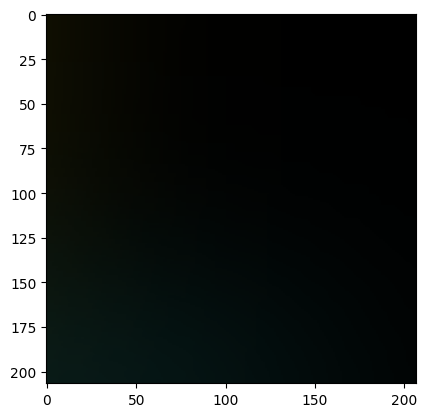

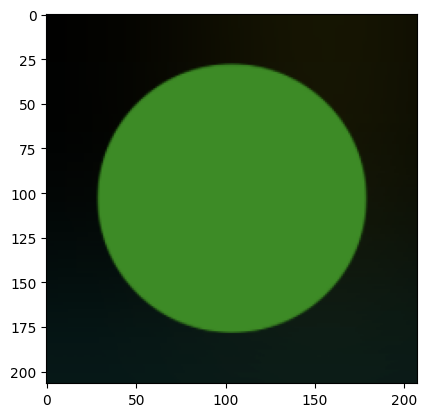

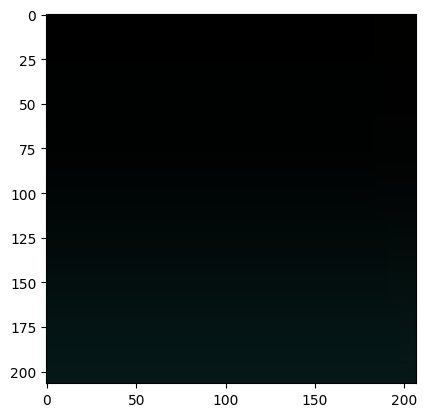

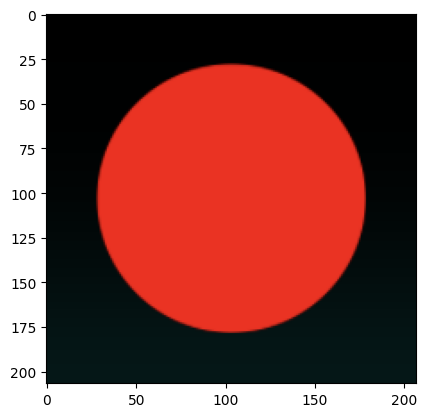

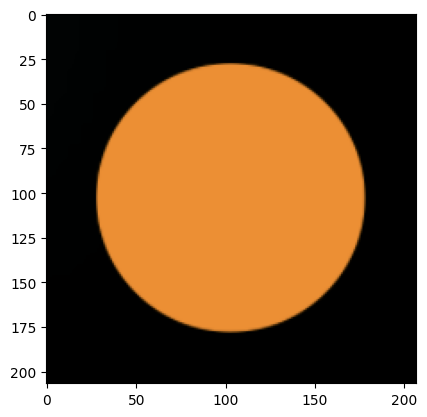

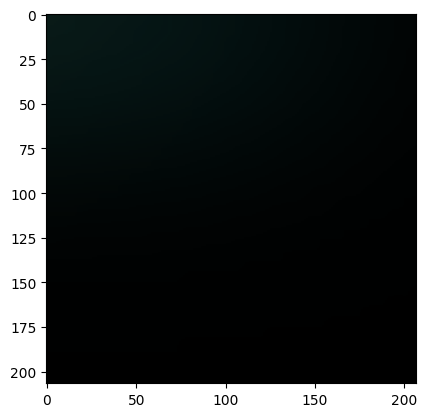

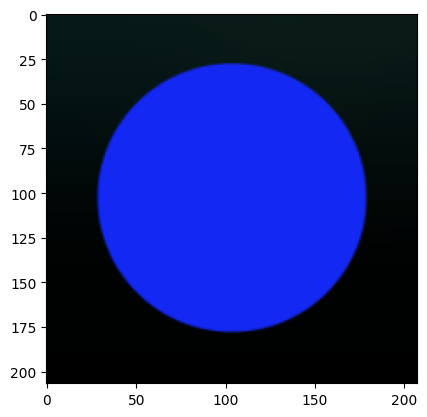

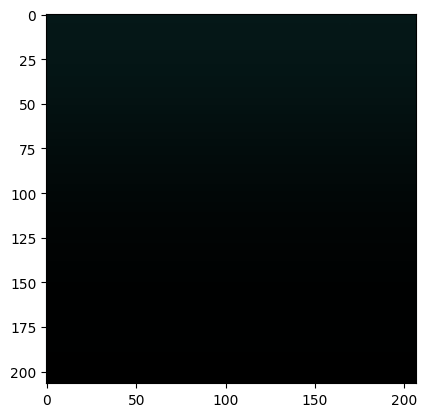

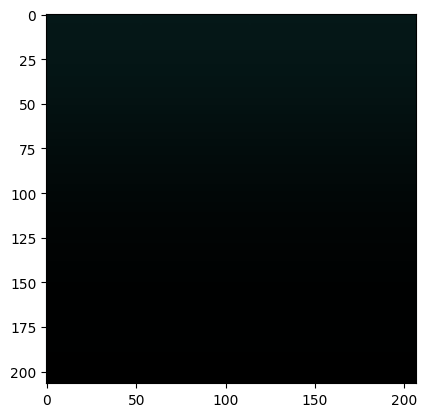

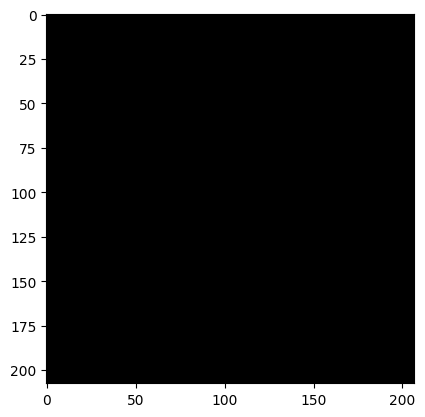

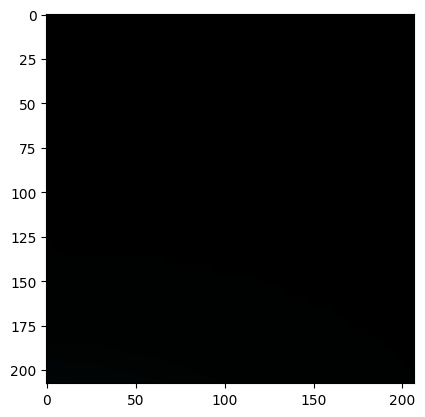

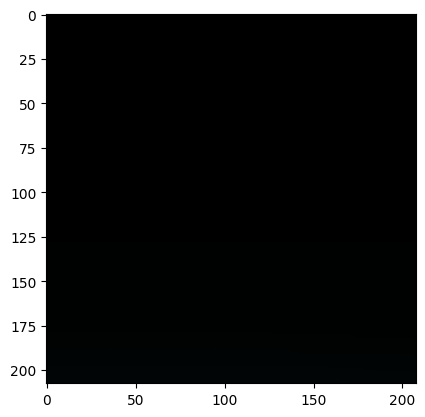

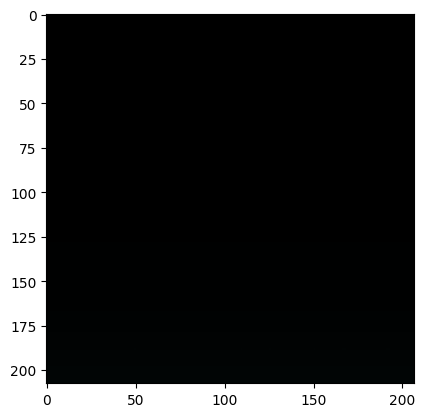

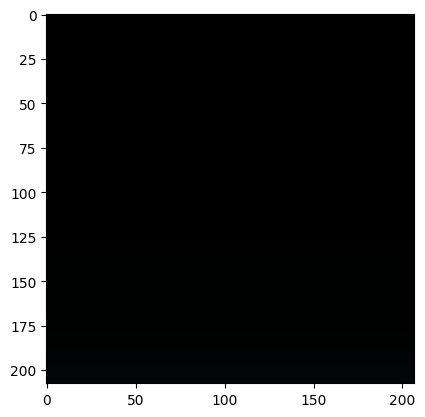

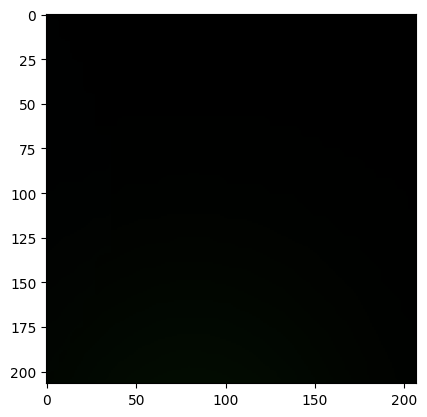

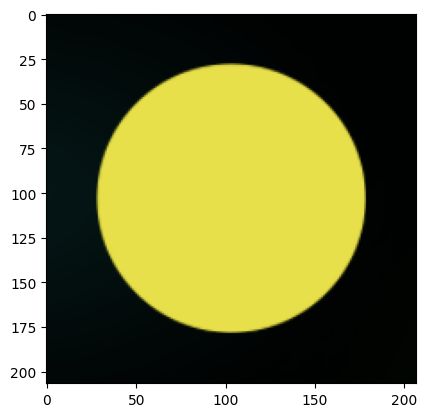

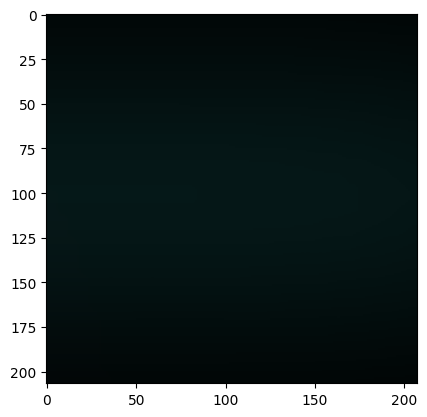

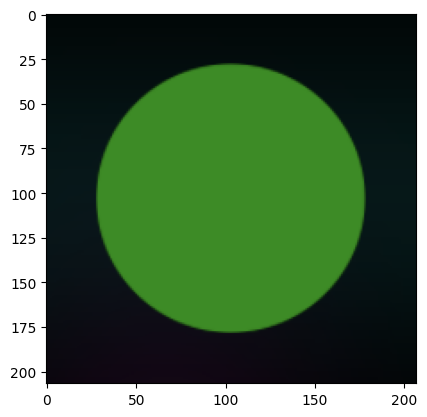

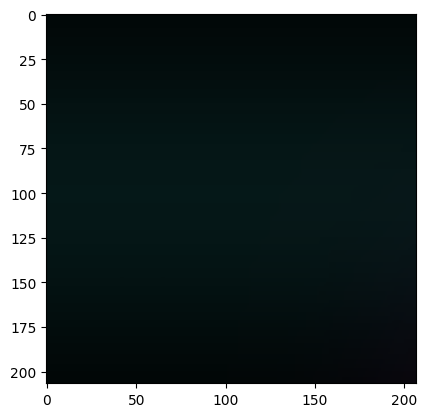

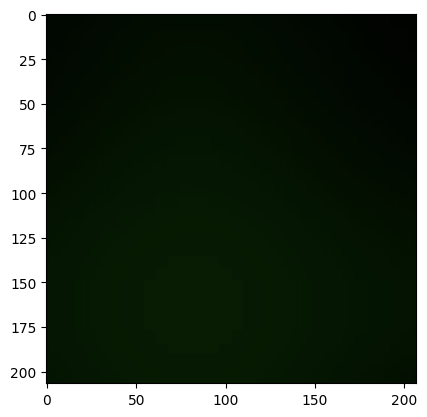

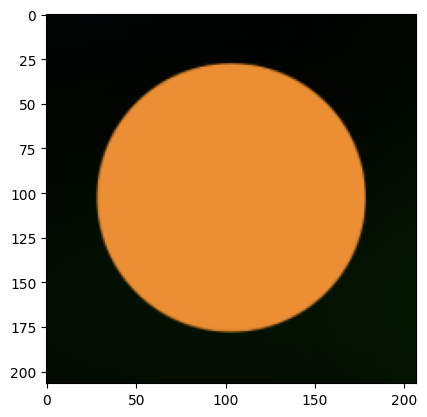

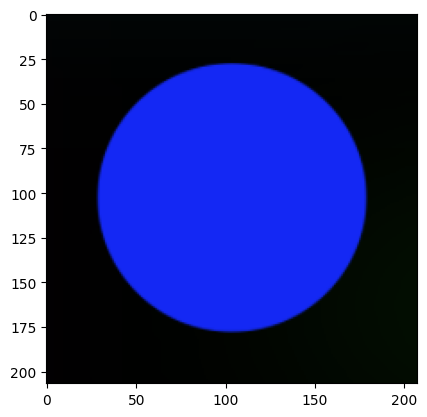

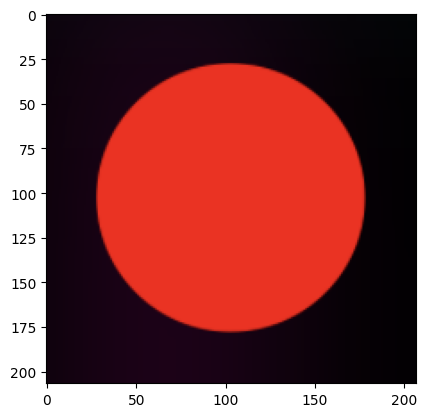

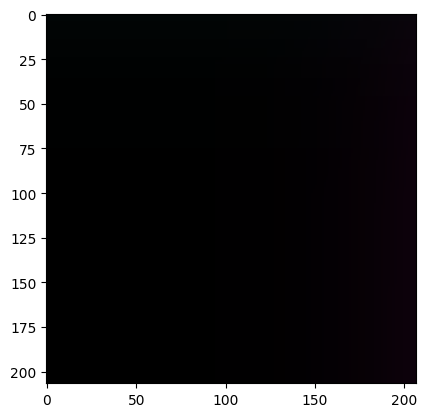

In [51]:


def percentDif(a : int, b : int):
    return 100 * (abs(a - b) / ((a + b) / 2))

for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if percentDif(w, h) < 10:
        new_img = img_rgb[y:y+h, x:x+w]
        plt.imshow(new_img)
        plt.show()